In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [31]:
start = '2014-01-01'
end = '2024-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [32]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2014-01-02,27.593388,27.708162,27.472912,27.651396,73129082
2014-01-03,27.392099,27.687835,27.390364,27.639993,66917888
2014-01-06,27.697504,27.735678,27.427797,27.590663,71037271
2014-01-07,28.231462,28.252039,27.792695,27.887885,102486711
2014-01-08,28.290215,28.441181,28.093387,28.408459,90036218
...,...,...,...,...,...
2024-12-16,197.934509,200.411683,193.889115,194.143830,32248600
2024-12-17,196.895676,202.649131,196.466172,198.304075,24129500


In [33]:
ma_100_days = data.Close.rolling(window=100).mean()

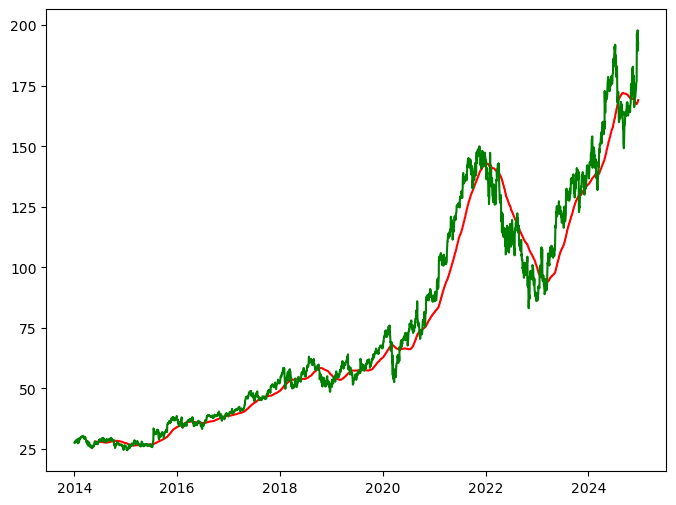

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [35]:
ma_200_days = data.Close.rolling(window=200).mean()

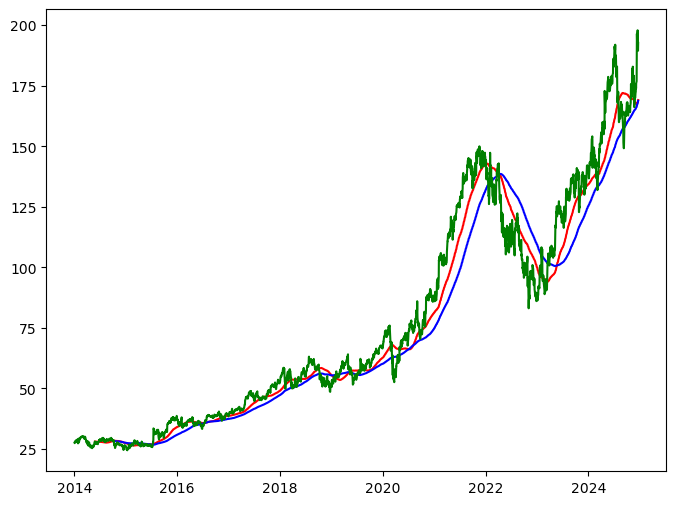

In [36]:
plt.figure(figsize=(8, 6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [37]:
# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)
df

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2014-01-02,27.593388,27.708162,27.472912,27.651396,73129082
2014-01-03,27.392099,27.687835,27.390364,27.639993,66917888
2014-01-06,27.697504,27.735678,27.427797,27.590663,71037271
2014-01-07,28.231462,28.252039,27.792695,27.887885,102486711
2014-01-08,28.290215,28.441181,28.093387,28.408459,90036218
...,...,...,...,...,...
2024-12-16,197.934509,200.411683,193.889115,194.143830,32248600
2024-12-17,196.895676,202.649131,196.466172,198.304075,24129500


In [38]:
print(df.columns)

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])


In [39]:
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2014-01-02,27.593388,27.708162,27.472912,27.651396,73129082
2014-01-03,27.392099,27.687835,27.390364,27.639993,66917888
2014-01-06,27.697504,27.735678,27.427797,27.590663,71037271
2014-01-07,28.231462,28.252039,27.792695,27.887885,102486711
2014-01-08,28.290215,28.441181,28.093387,28.408459,90036218


In [40]:
df.dropna(inplace=True)

In [41]:
df_train = pd.DataFrame(df.Close[:int(len(df)* 0.80)])
df_test = pd.DataFrame(df.Close[int(len(df)* 0.80): len(df)])

In [42]:
df_train.shape[0]

2209

In [43]:
df_test.shape[0]

553

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))

In [45]:
df_train_scale = scaler.fit_transform(df_train)

In [46]:
x = []
y = []

for i in range(100, df_train_scale.shape[0]):
    x.append(df_train_scale[i-100:i])
    y.append(df_train_scale[i,0])

In [58]:
x, y = np.array(x), np.array(y)

In [59]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [62]:
model = Sequential()
model.add(LSTM(units=50, activation= 'relu', return_sequences=True, input_shape=((x.shape[1], 1))))

model.add(Dropout(0.2))

model.add(LSTM(units=60), activation= 'relu', return_sequences=True)
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

IndexError: tuple index out of range